In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.datasets import load_diabetes

In [261]:
X, y = load_diabetes(return_X_y=True)

In [262]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [263]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [264]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

def bias(y, z):
    return (y - z)

In [268]:
## Реализуем функцию обучения градиентного бустинга.

def gb_fit(n_trees, max_depth, X_tr, X_tst, y_tr, y_tst, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=5)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_tr, y_tr)
            
            train_errors.append([n_trees, mean_squared_error(y_tr, gb_predict(X_tr, trees, coefs, eta))])
            test_errors.append([n_trees, mean_squared_error(y_tst, gb_predict(X_tst, trees, coefs, eta))])
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_tr, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_tr, target))
            
            train_errors.append([n_trees, mean_squared_error(y_tr, gb_predict(X_tr, trees, coefs, eta))])
            test_errors.append([n_trees, mean_squared_error(y_tst, gb_predict(X_tst, trees, coefs, eta))])

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [269]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

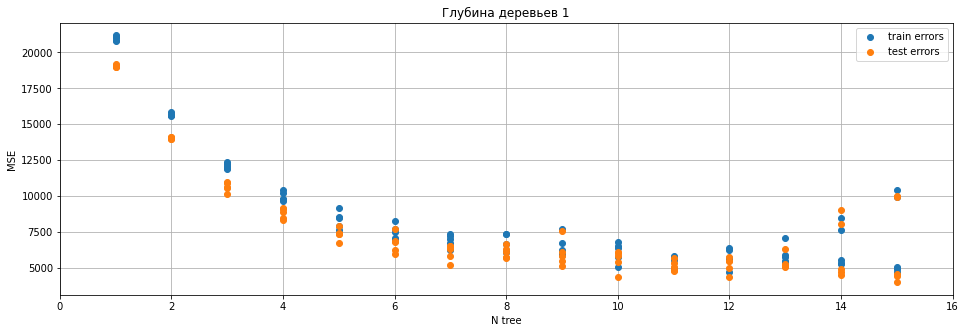

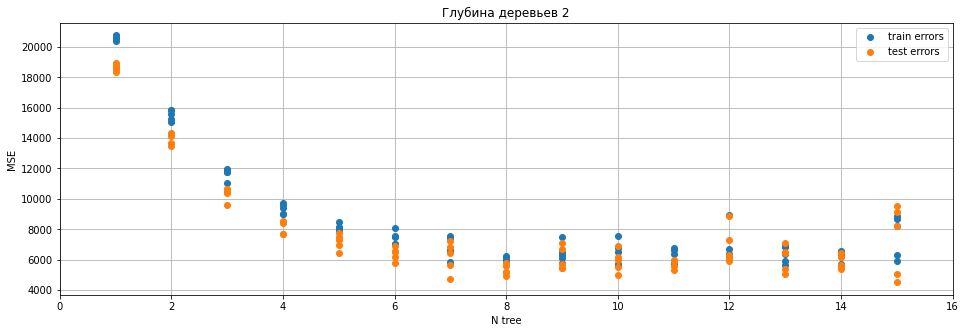

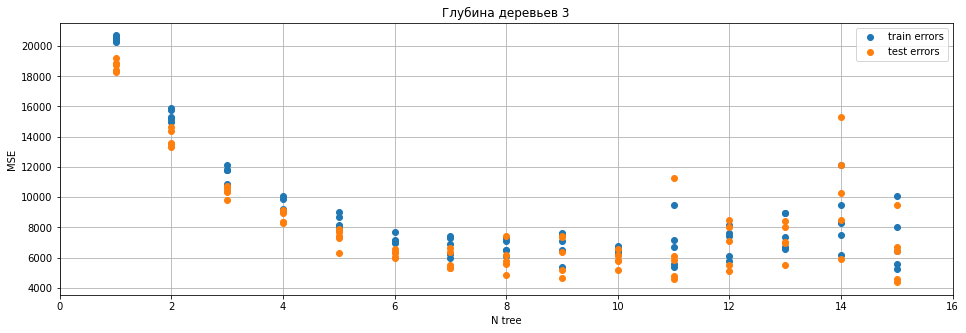

In [277]:
for j in range(1, 4): ### глубина
# Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_error = []
    test_error = []
    for i in range(1, 16):
        coefs = [1] * i
        for k in range(5):
            ind = np.random.randint(0,X_train.shape[0],X_train.shape[0]) ## создание уникальной подвыборки
            trees, train_errors, test_errors = gb_fit(i, j, X_train[ind,:], X_test, y_train[ind], y_test, coefs, eta)
            train_error.append([i, mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta))])
            test_error.append([i, mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta))])


    train_error = np.array(train_error)
    test_error = np.array(test_error)
    x = list(range(16))
    plt.figure(figsize = (16,5))
    plt.xlim(0, 16)
    plt.plot(train_error[:,0], train_error[:,1],'o', label='train errors')
    plt.plot(test_error[:,0],test_error[:,1],'o', label='test errors')
    plt.xlabel('N tree')
    plt.ylabel('MSE')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.title(f'Глубина деревьев {j}')
    plt.show()

In [ ]:
Чем больше деревьев, тем меньше ошибка, но после нахождения минимума, ошибка снова возрастает.
При этом, чем больше глубина, тем больший уровень разброса MSE по разным итерациям в рамках одного алгоритма
(например при глубине 3 на алгоритме из 11 деревьев разброс уровня ошибки на тестовых данных варьируется от 4200 - 11500).
При глубине 1 минимальная ошибка достигнута при количестве деревьев == 11 (MSE < 6500).
При глубине 2 минимальная ошибка < 6300, алгоритм из 8-ми деревьев.
На глубине 3 получены не самые лучшие данные, т.к. минимальная ошибка от 5000 - 7000 на алгоритме из 11 деревьев.
